# Modelo de regresión logística

## 1. Importar librerías

In [127]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## 2. Cargar dataset de csv

Este dataset contiene dos variables: Horas de estudio diario y si aprobó o reprobó la materia.

In [128]:
path = """https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databaset's/horas_estudio_vs_aprobacion.csv"""
dataFrame = pd.read_csv(path, encoding='utf-8')

## 3. Mostrar descripción del dataset

In [129]:
dataFrame.head(10)

,horas,aprueba
0,0.50,1
1,2.00,0
2,0.75,0
3,2.75,1
4,2.75,1
5,1.25,0
6,2.75,1
7,1.50,1
8,1.50,0
9,0.50,0


In [130]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   horas    2000 non-null   float64
 1   aprueba  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [131]:
dataFrame.describe()

,horas,aprueba
count,2000.000000,2000.000000
mean,2.647625,0.496000
std,1.415867,0.500109
min,0.250000,0.000000
25%,1.500000,0.000000
50%,2.750000,0.000000
75%,3.750000,1.000000
max,5.000000,1.000000


In [132]:
dataFrame.isnull().sum()

horas      0
aprueba    0
dtype: int64

In [133]:
dataFrame.shape

(2000, 2)

## 4. Visualizando distribución de los datos

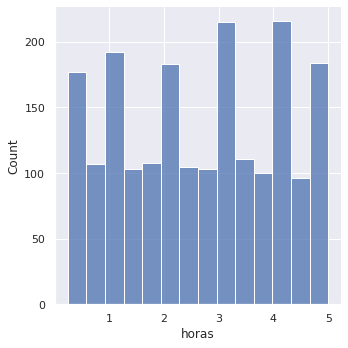

In [134]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.displot(dataFrame['horas'])
plt.show()

## 5. Separar los datos para el entrenamiento

In [135]:
x_train = np.array(dataFrame['horas']).reshape(-1, 1)
y_train = np.array(dataFrame['aprueba'])

## 6. Entrenar modelo de regresión logística con los datos de entrenamiento

In [136]:
reg_log = LogisticRegression()
reg_log.fit(x_train, y_train)

LogisticRegression()

## 7. Predicciones del modelo de regresión logística

In [137]:
x_data = np.array([1, 8, 3, 2, 5, 15]).reshape(-1, 1)
prediction = reg_log.predict(x_data)
print(prediction)

[0 1 0 0 1 1]


## 8. Probabilidades

In [138]:
probabilidad = reg_log.predict_proba(x_data)
print(probabilidad)

print('\nProbabilidad de reprobar: ')
print(probabilidad[:, 0])

print('\nProbabilidad de aprobar: ')
print(probabilidad[:, 1])

[[0.5112111  0.4887889 ]
 [0.48058141 0.51941859]
 [0.50245829 0.49754171]
 [0.50683522 0.49316478]
 [0.49370398 0.50629602]
 [0.45009699 0.54990301]]

Probabilidad de reprobar: 
[0.5112111  0.48058141 0.50245829 0.50683522 0.49370398 0.45009699]

Probabilidad de aprobar: 
[0.4887889  0.51941859 0.49754171 0.49316478 0.50629602 0.54990301]


# Agregar variable de horas de tutoría al mes

## 1. Cargar el nuevo dataset

Este dataset incluye las variables anteriores (horas de auto estudio y si aprobó o reprobó) y la nueva variable de horas de tutorías al mes.

In [139]:
path = """https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databaset's/horas_estudio_tutorias_vs_aprobacion.csv"""
newDataFrame = pd.read_csv(path, encoding='utf-8')

## 2. Conocer los datos del dataset

In [140]:
newDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   horas_autoestudio_diario  1000 non-null   int64
 1   tutorias_mes              1000 non-null   int64
 2   aprobo_perdio             1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [141]:
newDataFrame.describe()

,horas_autoestudio_diario,tutorias_mes,aprobo_perdio
count,1000.000000,1000.000000,1000.000000
mean,5.744000,31.230000,0.499000
std,2.121076,5.976355,0.500249
min,0.000000,20.000000,0.000000
25%,4.000000,26.000000,0.000000
50%,6.000000,30.000000,0.000000
75%,7.000000,36.000000,1.000000
max,10.000000,50.000000,1.000000


In [142]:
newDataFrame.isnull().sum()

horas_autoestudio_diario    0
tutorias_mes                0
aprobo_perdio               0
dtype: int64

In [143]:
newDataFrame.shape

(1000, 3)

## 4. Visualizar la información de los datos

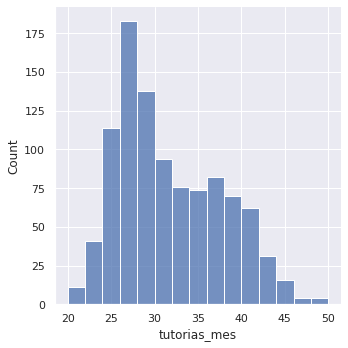

In [144]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.displot(newDataFrame['tutorias_mes'])
plt.show()

## 5. Separar los datos para el entrenamiento

In [145]:
X_axis = newDataFrame.drop('aprobo_perdio', axis=1)
Y_axis = newDataFrame.aprobo_perdio

## 6. Dividir los conjuntos de datos para el entrenamiento del modelo

Se elegirá una distribución de 80% para el entrenamiento y 20% para las pruebas.

In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(X_axis, Y_axis, random_state=4, test_size=0.2)

## 7. Entrenar el modelo de regresión logística

In [147]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

LogisticRegression()

## 8. Predicciones del modelo de regresión logística con los datos de prueba

In [148]:
prediction = logistic_regression.predict(X_test)

## 9. Generando nivel de inferencia del modelo

In [149]:
inferencia = metrics.accuracy_score(Y_test, prediction)
print(f'Nivel de inferencia del modelo: {str(100 * inferencia)} %')

Nivel de inferencia del modelo: 97.0 %


## 10. Predicciones del modelo de regresión logística

In [150]:
data = np.array([[2, 15], [1, 2], [3, 41], [1, 7], [4, 1], [9, 11]])
x_data = pd.DataFrame(data, columns=['horas_autoestudio_diario', 'tutorias_mes'])
y_prediction = logistic_regression.predict(x_data)
print(y_prediction)

[0 1 0 1 1 1]
